In [9]:
#import all the library needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [11]:
#reading the data points from the CSV
data=pd.read_csv('ClusterPlot.csv')
data

,Unnamed: 0,V1,V2
0,0,4.30,0.80
1,1,3.95,0.80
2,2,3.95,0.75
3,3,3.85,0.85
4,4,4.30,0.80
...,...,...,...
145,145,4.85,3.75
146,146,4.40,3.45
147,147,4.75,3.60
148,148,4.80,3.85


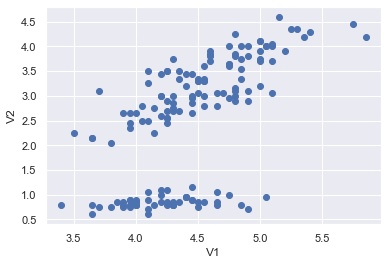

In [12]:
#plotting the data points to get a visual idea
plt.scatter(data['V1'],data['V2'])
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

In [13]:
#create a copy of our data and store it in a variable x
x=data.copy()
#scale the data
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)
x_scaled

array([[-1.72054204e+00, -3.34555875e-01, -1.34331530e+00],
       [-1.69744751e+00, -1.12218742e+00, -1.34331530e+00],
       [-1.67435299e+00, -1.12218742e+00, -1.38332667e+00],
       [-1.65125846e+00, -1.34722501e+00, -1.30330392e+00],
       [-1.62816394e+00, -3.34555875e-01, -1.34331530e+00],
       [-1.60506942e+00,  4.53075670e-01, -1.14325841e+00],
       [-1.58197489e+00, -1.00966863e+00, -1.30330392e+00],
       [-1.55888037e+00, -5.59593460e-01, -1.30330392e+00],
       [-1.53578584e+00, -1.79730017e+00, -1.34331530e+00],
       [-1.51269132e+00, -1.00966863e+00, -1.34331530e+00],
       [-1.48959680e+00,  2.28038086e-01, -1.30330392e+00],
       [-1.46650227e+00, -7.84631044e-01, -1.26329254e+00],
       [-1.44340775e+00, -1.23470621e+00, -1.38332667e+00],
       [-1.42031323e+00, -1.79730017e+00, -1.50336080e+00],
       [-1.39721870e+00,  1.01566963e+00, -1.42333805e+00],
       [-1.37412418e+00,  1.35322601e+00, -1.22328116e+00],
       [-1.35102965e+00,  4.53075670e-01

In [14]:
#elbow mwthod
wcss=[]

for i in range(1,150):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[450.0,
 188.3668264799306,
 118.27608319347155,
 94.36087369535173,
 75.30507881318829,
 56.728784158459575,
 48.97780705011023,
 42.382835905943686,
 36.334338892951784,
 33.70680305361478,
 31.45500026827651,
 29.061021384583555,
 26.195777405375765,
 25.240075347447036,
 23.040336729751584,
 21.215551908756055,
 19.50175820816626,
 17.684623933830526,
 16.931882684262103,
 17.072648476772574,
 15.70505177080664,
 14.337752560157893,
 14.150198726618834,
 13.480492113207577,
 12.434715807198721,
 12.271074964067996,
 11.334562233947779,
 10.62679675203633,
 10.785454411158513,
 9.622745018515017,
 9.204299790552602,
 8.692041664999726,
 8.400249470704447,
 7.948893401094739,
 7.590008965463018,
 7.256713130819851,
 7.057913639512902,
 6.62452472003877,
 6.2367053437769995,
 6.096864072502332,
 5.694270658048938,
 5.499571362360817,
 5.612710736698214,
 5.088358736272206,
 4.9409766423619965,
 4.696386624906077,
 4.653855974117876,
 4.433298192886281,
 4.317218618696706,
 4.267778347

<function matplotlib.pyplot.show(close=None, block=None)>

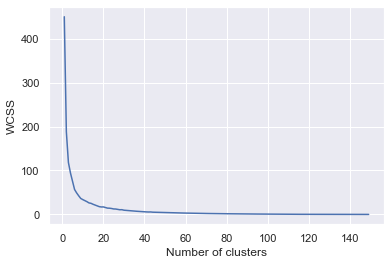

In [15]:
#visualizing the elbow
plt.plot(range(1,150),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

In [18]:
#from the elbow, we can determine the optimal number of clusters is 10 since the graph starts to curve around 10 and remains consistent after
kmeans_new=KMeans(10)
kmeans.fit(x_scaled)
cluster_new=x.copy()
cluster_new['cluster_prediction']=kmeans_new.fit_predict(x_scaled)
cluster_new

,Unnamed: 0,V1,V2,cluster_prediction
0,0,4.30,0.80,6
1,1,3.95,0.80,0
2,2,3.95,0.75,0
3,3,3.85,0.85,0
4,4,4.30,0.80,6
...,...,...,...,...
145,145,4.85,3.75,1
146,146,4.40,3.45,7
147,147,4.75,3.60,1
148,148,4.80,3.85,1


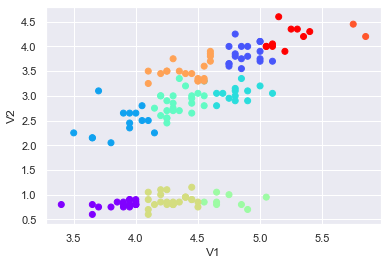

In [19]:
#plotting the new cluster
plt.scatter(cluster_new['V1'],cluster_new['V2'],c=cluster_new['cluster_prediction'],cmap='rainbow')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

In [ ]:
#number of clusters is 10